# GOAL:PREDICT THE SALARY OF EMPLOYEE

STEPS:
* 1)EXPLORATORY DATA ANALYSIS AND FEATURE ENGINEERING
* 2)FEATURE SELECTION AND SCALING
* 3)MODEL BUILDING

MODEL PERFORMANCE(RANDOM-FOREST)---100% R2 VALUE

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
#Loading
df = pd.read_csv('/kaggle/input/employee-salary-dataset/employee_data.csv')

/kaggle/input/employee-salary-dataset/employee_data.csv


# LOADING AND DATA EXPLORATION

In [2]:
#check first 5 rows
df.head()

,Unnamed: 0,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,A,36,5,5,2297
1,1,1,A,55,3,5,1134
2,2,2,A,61,8,1,4969
3,3,3,O,29,3,6,902
4,4,4,O,34,6,2,3574


In [3]:
#bottom five
df.head()

,Unnamed: 0,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,A,36,5,5,2297
1,1,1,A,55,3,5,1134
2,2,2,A,61,8,1,4969
3,3,3,O,29,3,6,902
4,4,4,O,34,6,2,3574


In [4]:
#drop unwanted  columns
df = df.drop(['Unnamed: 0'],axis=1)

In [5]:
df = df.drop(['id'],axis=1)

In [6]:
#after dropping
df.head()

,groups,age,healthy_eating,active_lifestyle,salary
0,A,36,5,5,2297
1,A,55,3,5,1134
2,A,61,8,1,4969
3,O,29,3,6,902
4,O,34,6,2,3574


In [7]:
#check rows and columns
df.shape

(1000, 5)

In [8]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   groups            1000 non-null   object
 1   age               1000 non-null   int64 
 2   healthy_eating    1000 non-null   int64 
 3   active_lifestyle  1000 non-null   int64 
 4   salary            1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [9]:
#get some stat
df.describe()

,age,healthy_eating,active_lifestyle,salary
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,41.155000,4.944000,5.683000,2227.46100
std,13.462995,2.013186,2.048587,1080.20976
min,18.000000,0.000000,0.000000,553.00000
25%,30.000000,4.000000,4.000000,1360.00000
50%,41.000000,5.000000,6.000000,2174.00000
75%,53.000000,6.000000,7.000000,2993.75000
max,64.000000,10.000000,10.000000,5550.00000


In [10]:
df.head()

,groups,age,healthy_eating,active_lifestyle,salary
0,A,36,5,5,2297
1,A,55,3,5,1134
2,A,61,8,1,4969
3,O,29,3,6,902
4,O,34,6,2,3574


How does age relate with healthy_eating and active_lifestyle?

<AxesSubplot:xlabel='age', ylabel='healthy_eating'>

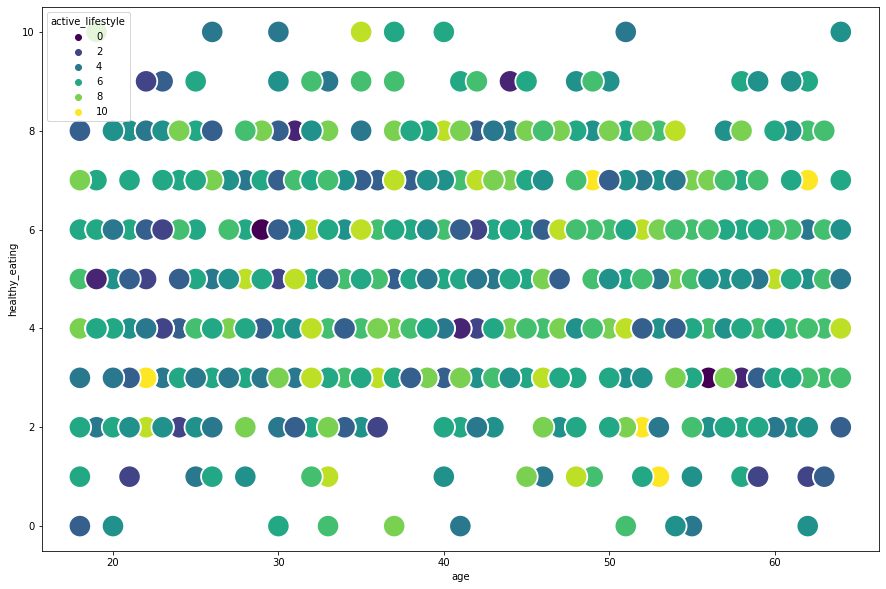

In [11]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['age'],y=df['healthy_eating'],hue=df['active_lifestyle'],palette="viridis",s=500)

How does healthy_eating relate with salary?

<AxesSubplot:xlabel='salary', ylabel='healthy_eating'>

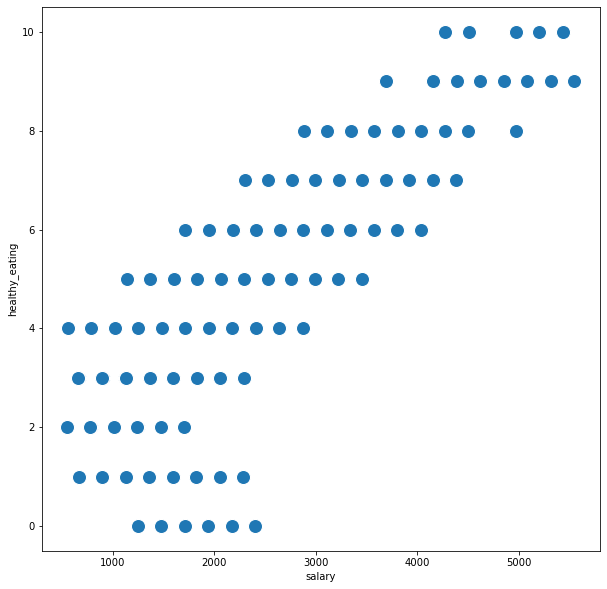

In [12]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['salary'],y=df['healthy_eating'],palette='rocket',s=200)

compare the blood groups to their average salary ?

In [13]:
pd.pivot_table(df, index = 'groups', values = ['salary'], aggfunc='mean')

,salary
groups,
A,2176.221333
AB,2261.688000
B,2232.776000
O,2265.520000


Visualise how groups relate with salary?

<AxesSubplot:xlabel='groups', ylabel='salary'>

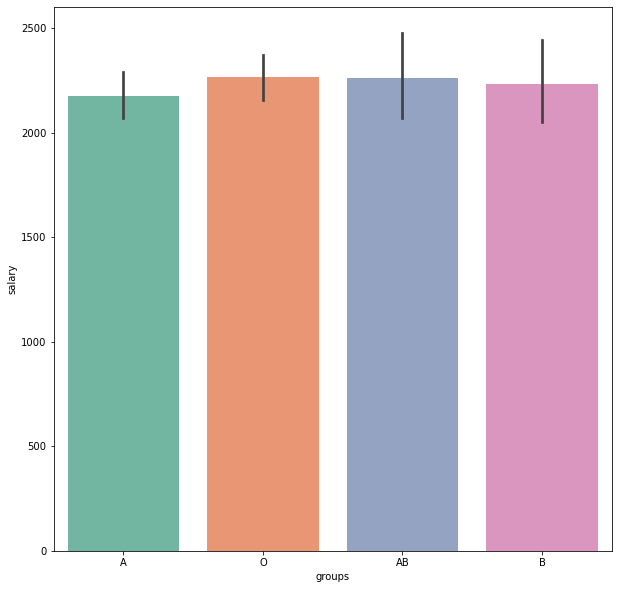

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['groups'],y=df['salary'],palette='Set2')

How does active_lifestyle relate with salary?

<AxesSubplot:xlabel='salary', ylabel='active_lifestyle'>

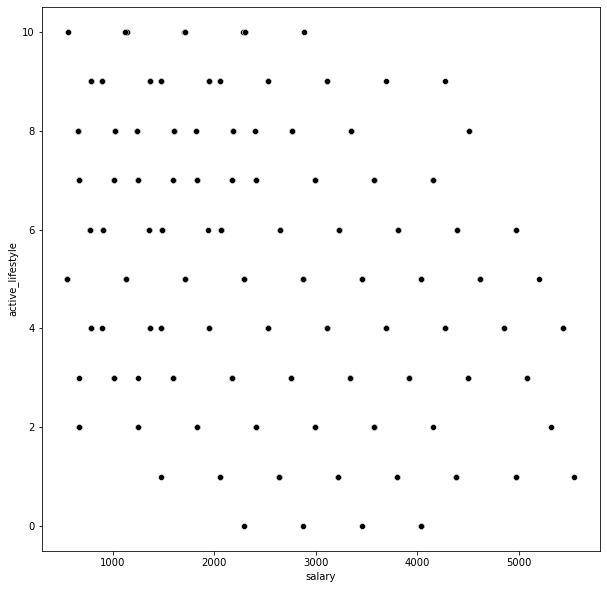

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['salary'],y=df['active_lifestyle'],color='black')

How does age relate with salary?

<AxesSubplot:xlabel='age', ylabel='salary'>

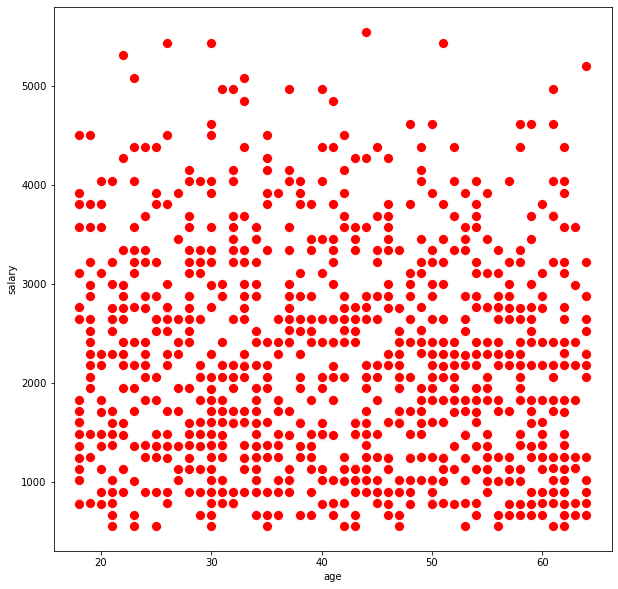

In [16]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['age'],y=df['salary'],color='r',s=100)

create new feature called healthy_person?

In [17]:
df['healthy_person'] = df.apply(lambda row:1 if row['healthy_eating']&row['active_lifestyle']>=7 else 0, axis=1)

how does being healthy affect their salary?

<AxesSubplot:xlabel='healthy_person', ylabel='salary'>

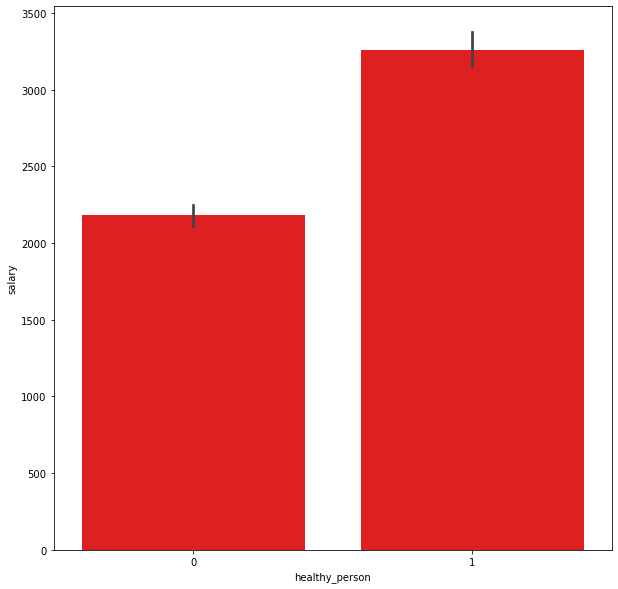

In [18]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['healthy_person'],y=df['salary'],color='r')

categorical encoding

In [19]:
df = pd.get_dummies(df,drop_first=True)

# FEATURE SELECTION AND SCALING

In [20]:
#separate data into x and y 
y = df.salary
x=df.drop(['salary'],axis=1)

In [21]:
#splitting data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [22]:
#define and fit to data
best_features = SelectKBest(chi2,k='all')
fit = best_features.fit(x_train,y_train)

In [23]:
#get the scores for each variable
xscores = pd.DataFrame(fit.scores_)
xcolumns = pd.DataFrame(x_train.columns)



In [24]:
feat_scores = pd.concat([xcolumns,xscores],axis=1)
feat_scores.columns = ['Features','scores']

In [25]:
#lets get the best features
feat_scores

,Features,scores
0,age,563.087338
1,healthy_eating,656.379747
2,active_lifestyle,597.367943
3,healthy_person,768.000000
4,groups_AB,105.997556
5,groups_B,100.755875
6,groups_O,60.572602


In [26]:
#Feature Scaling
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [27]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# MODEL BUILDING

In [28]:

#create instance of random forest
rf_reg=RandomForestRegressor(random_state=20)

In [29]:
#fit the train data
rf_reg.fit(x_train_scaled,y_train)

RandomForestRegressor(random_state=20)

In [30]:
#predict test data
pred_y = rf_reg.predict(x_test_scaled)

In [31]:
print('r2 of random forest regressor:',np.round(rf_reg.score(x_test_scaled,y_test),2)*100)

r2 of random forest regressor: 100.0


RANDOM FOREST GAVE R2 OF APPROXIMATELY 100%